# Clustered dotplots

In [1]:
library(ggplot2)
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

## Get data

In [47]:
ds <- data.table::fread("diffSplice_enrichment_analysis.txt") %>%
    mutate_if(is.character, as.factor)
ds$Tissue <- factor(ds$Tissue, levels=c("Caudate", "Dentate Gyrus", "DLPFC", "Hippocampus"))
ds$Feature <- factor(ds$Feature, levels=c("Gene", "Transcript", "Exon", "Junction"))
ds$Tissue <- fct_relevel(ds$Tissue, rev)

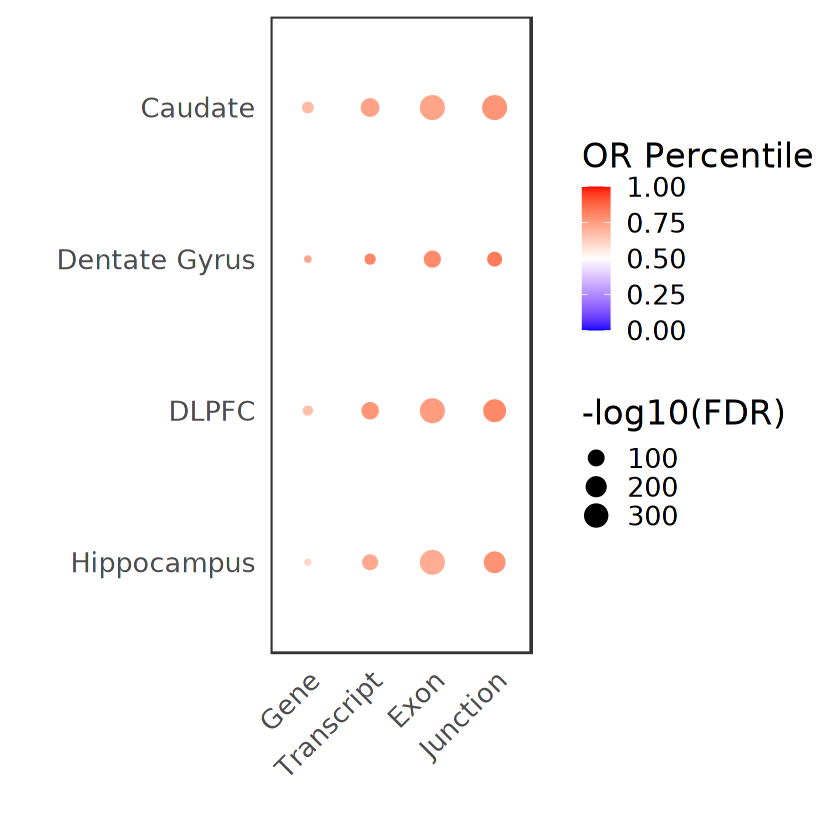

In [55]:
dotplot <- ds %>% 
    mutate(`-log10(FDR)` = -log10(FDR), `OR Percentile` = OR / (1+OR)) %>% 
    filter(OR != 0) %>%
    ggplot(aes(y=Tissue, x=Feature, color=`OR Percentile`, size=`-log10(FDR)`)) + 
    geom_point() + ylab('') + xlab('') +
    scale_color_gradient2(midpoint = 0.5, low = "blue", mid = "white",
                          high = "red", space = "Lab", limits=c(0,1) ) +
    theme_bw(base_size=20) + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(face="bold"))
save_plot(dotplot, "dotplot_enrichment_diffSplice", 9, 5)
dotplot

## Reproducibility Information

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()